# Adquisición y adecuación de base de datos 

## En este ejercicio utilizaremos una base de datos elaborada por un banco portugues en el ámbito de prácticas de mercadeo. 

## El Dataset está compuesto por un total de 17 características relativas a clientes del banco. Fue recolectado mediante la aplicación de encuestas vía telefónica. 

## Los atributos del Dataset a trabajar son: 

### 1. "age":  edad 
### 2. "job": tipo de trabajo 
### 3. "marital": estado civil 
### 4. "education": nivel educativo
### 5. "default": si dejó de pagar sus obligaciones 
### 6. "balance": saldo promedio anual en euros 
### 7. "housing": ¿tiene o no crédito hipotecario? 
### 8. "loan": ¿tiene créditos de consumo? 
### 9. "contact": medio a través del cual fue contactado 
### 10. "day": último día del mes en el que fue contactada 
### 11. "month": último mes en el que fue contactada 
### 12. "duration": duración (en segundos) del último contacto 
### 13. "campaign": número total de veces que fue contactada durante la campaña
### 14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual 
### 15. "previous": número de veces que ha sido contactada antes de esta campaña 
### 16. "poutcome": resultado de la campaña de marketing anterior 
### 17. "y": categoría ¿el cliente se suscribió a un depósito a término? 


## Exploración del Dataset

### Para este ejercicio se trabajarán las librerías Pandas, Matplotlib.pyplot y Seaborn. Los estudiantes deberán explorar y escoger las funciones y las librerías a implementar al dataset. 

In [12]:
# Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del Dataset mediante pd.read_csv  
## Exploración del tamaño 45215 filas x 17 columnas

In [15]:
# Carga del DataFrame

data = pd.read_csv('./dataset_banco.csv')

# Visualización del tamaño de la base de datos
# Visualización del DataFrame
print(data.shape)
data.head( )

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Limpieza o depuración del Dataset

### Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

### 1. Datos faltantes en algunas celdas
### 2. Columnas irrelevantes (que no responden al problema que queremos resolver)
### 3. Registros (filas) repetidos
### 4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
### 5. Errores tipográficos en el caso de las variables categóricas

## Al final de este proceso de limpieza deberíamos tener un set de datos depurado, listo para la fase de Análisis Exploratorio.

# 1 Datos faltantes

## Al comprobar el número total de datos que tiene cada columna evidenciamos que no todas poseen la misma cantidad de datos. 

In [16]:
# Evaluación del tipo de variables por atributo (Variables categóricas y númericas)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


## Comprobando cantidad de datos faltantes (missing) en las variables

In [17]:
# Se contabilizan y muestran el número de datos pérdidos (nulos) para cada variable del Dataset
data.isnull().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

## Al tener relativamente pocos registros pérdidos se procederá a eliminar las filas correspondientes:

In [18]:
# Se eliminan las filas donde se encuentren registros de alguna variable sin datos

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


# 2 Columnas irrelevantes

## Una columna irrelevante puede ser:

### Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
### Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
### Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
### Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

## Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

## En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [19]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


## Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

### Verifiquemos lo que ocurre con las columnas numéricas. Para ello, aplicaremos un anáslis estadístico del Dataset mediante la función .describe() - Aquí se aplica un análisis descriptivo con las medidas de tendencia central.

In [20]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

### Preservaremos todas las columnas numéricas.

# 3 Filas repetidas

## Con la función .drop_duplicates() se eliminarán las filas con registros repetidos

In [21]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


# 4 *Outliers* en las variables numéricas

## Los datos "anormales" o "outliers" no siempre se deben eliminar porque dependiendo de la variable numérica analizada pueden contener información importante.

## Crearemos gráficas tipo "boxplot" de las columnas numéricas para visualizar este tipo de datos:

## Como veremos en las variables Age, Duration y Previous encontramos valores "outliers" 
### - "age": hay sujetos con edades mucho mayores a 100 años
### - "duration": hay valores negativos
### - "previous": hay un valor extremadamente alto (cercano a 300)

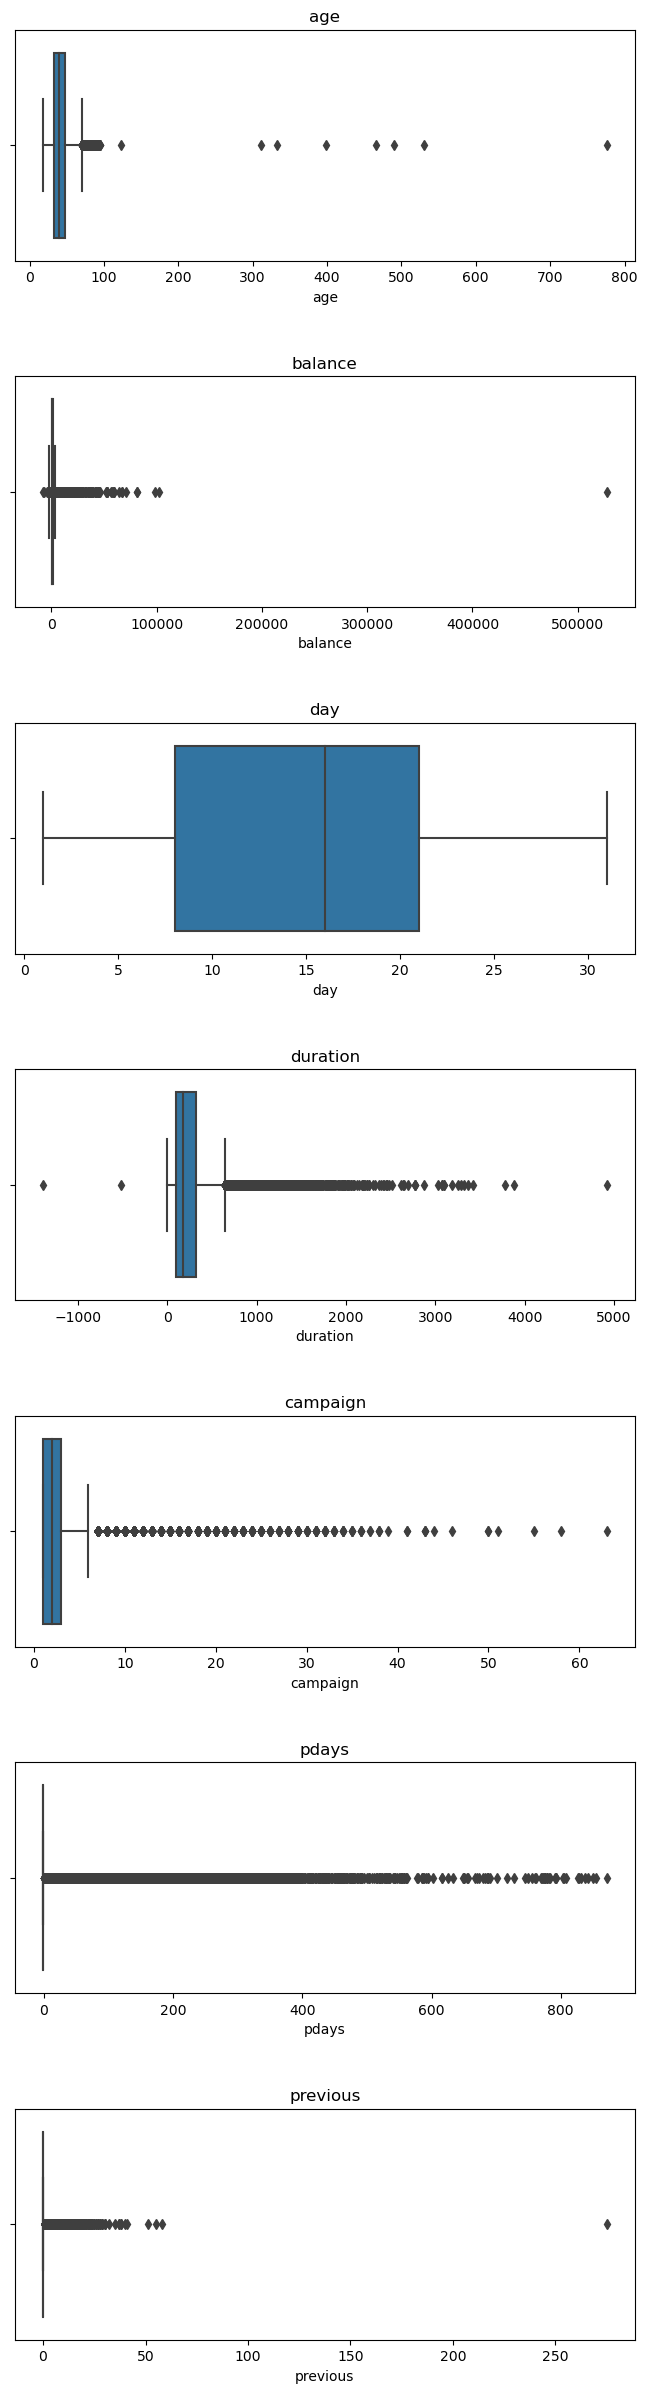

In [13]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# Se depurarán las filas en las que se encuentran estos datos "outliers"

## Variable "age" 

In [22]:
# Eliminar filas con "age">100

# Se muestra el número total de registros antes de depurarlos
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')

# Se eliminan las filas en las que se encuentran datos en la variable edad con registros mayores a 100 años 
data = data[data['age']<=100]

# Se muestra el número total de registros después de depurarlos
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


## Variable "duration" 

In [15]:
# Eliminar filas con "duration"<0

# Se muestra el número total de registros antes de depurarlos 
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')

# Se eliminan las filas en las que se encuentran datos en la variable con registros negativos
data = data[data['duration']>0]

# Se muestra el número total de registros después de depurarlos
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45190, 17)


## Variable "previous" 

In [16]:
# Eliminar filas con "previous">100

# Se muestra el número total de registros antes de depurarlos 
print(f'Tamaño del set antes de eliminar registros de previous: {data.shape}')

# Se eliminan las filas en las que se encuentran datos con resgistros < a 100 contactos telefónicos
data = data[data['previous']<=100]

# Se muestra el número total de registros después de depurarlos 
print(f'Tamaño del set después de eliminar registros de previous: {data.shape}')

Tamaño del set antes de eliminar registros de previous: (45190, 17)
Tamaño del set después de eliminar registros de previous: (45189, 17)


# 5 Errores tipográficos en variables categóricas

## En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

## Se deben unificar estos sub-niveles

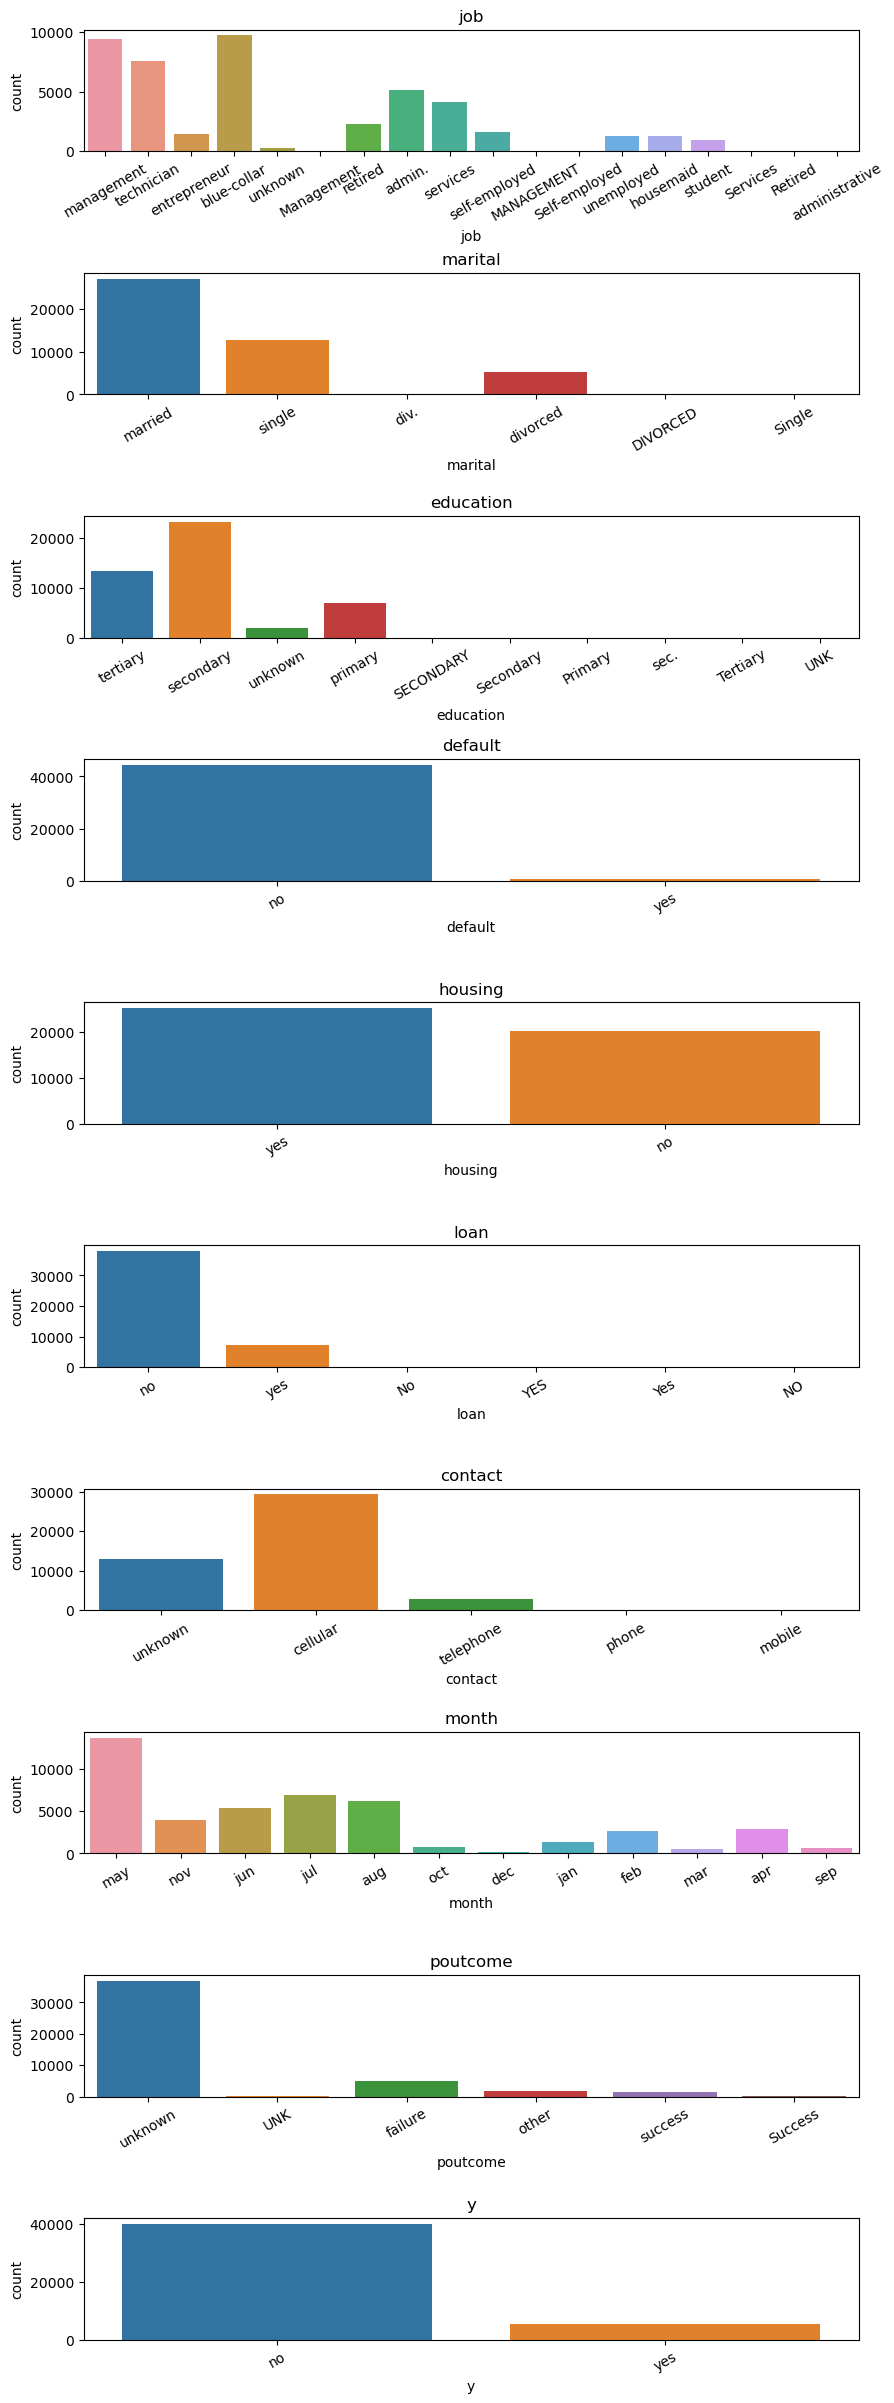

In [23]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

## Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

## Unifiquemos estos sub-niveles inicialmente:

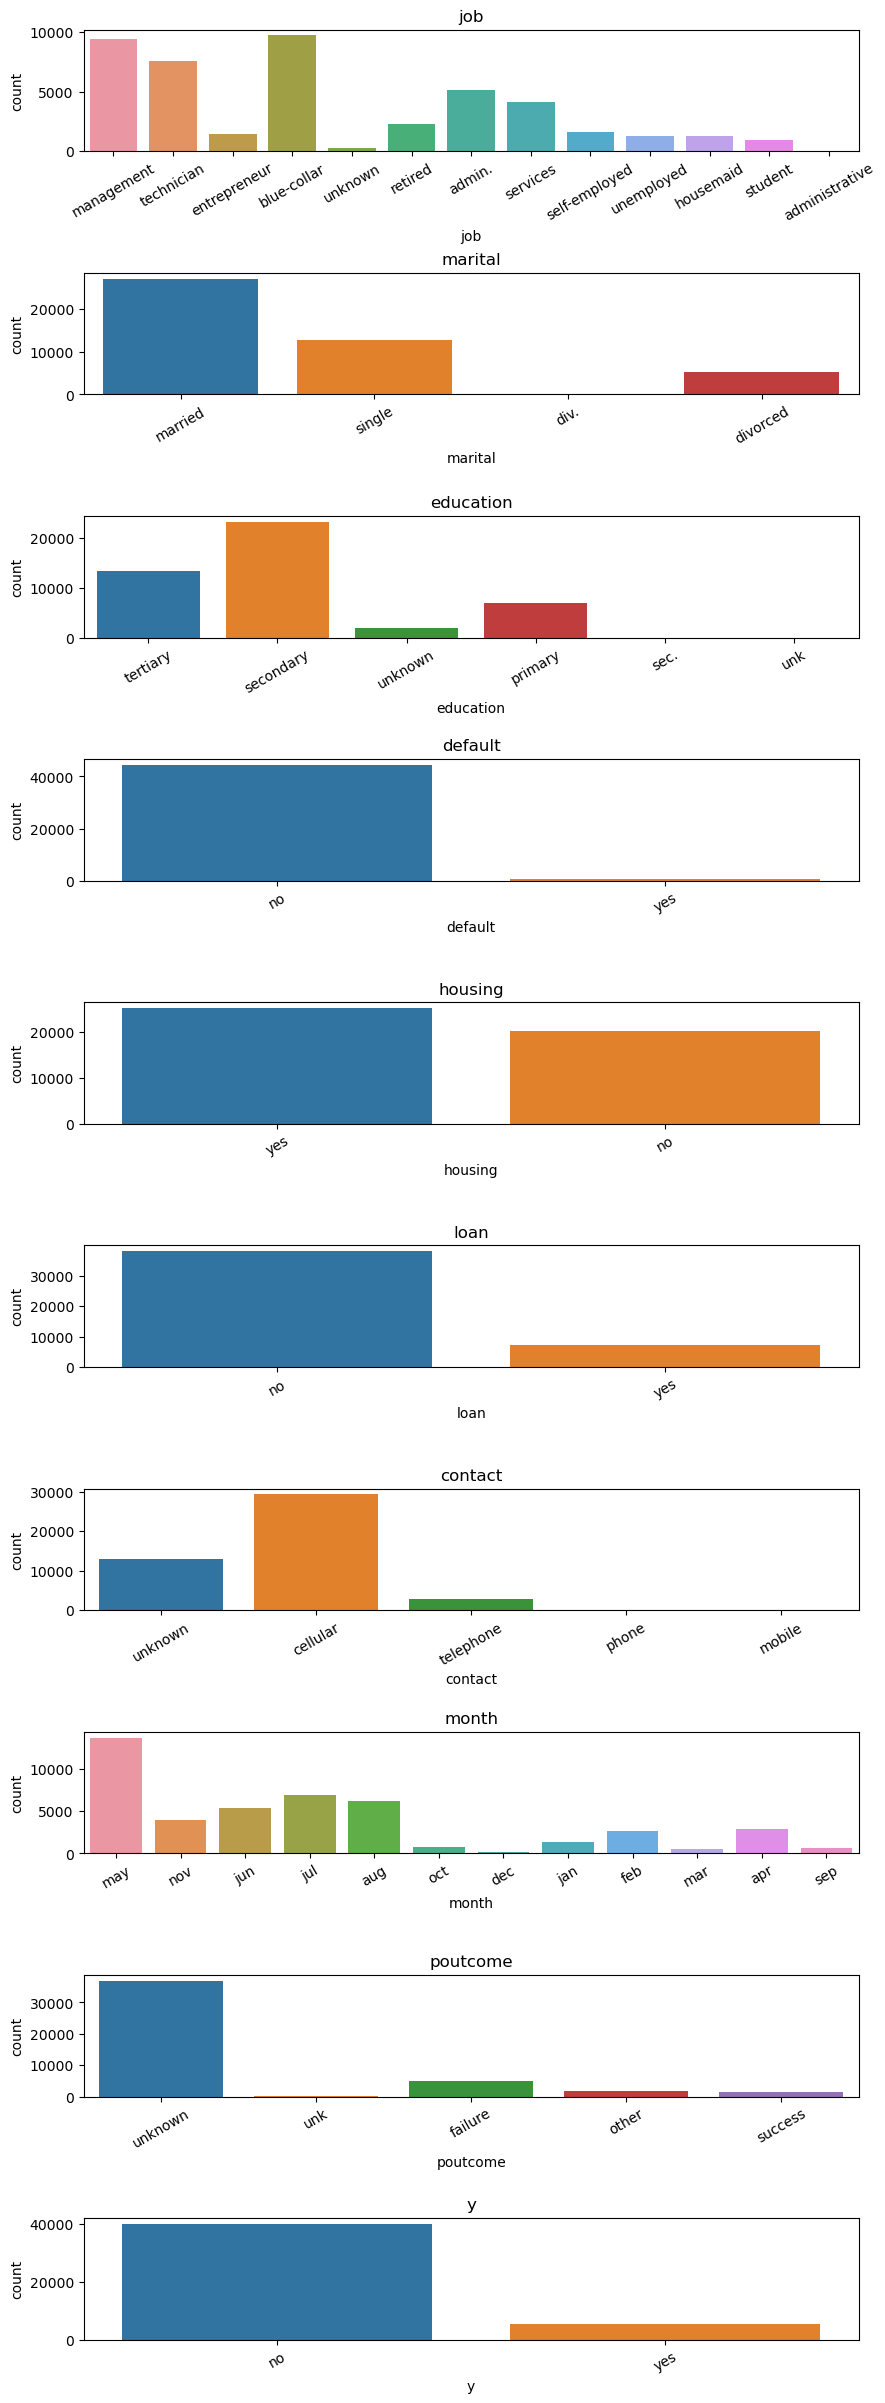

In [24]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

## Unificaremos categorias de una misma variable que representan lo mismo pero se encuentran escritas de diferente manera

## En la variable marital unificar div. y divorced

In [21]:
# marital: unificar div. y divorced
print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
print(data['marital'].unique())

['married' 'single' 'divorced']
['married' 'single' 'divorced']


## En la variable job unificar admin. y administrative

In [22]:
# job: unificar admin. y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


## En la variable education unificar sec. y secondary, unk y unknown

In [23]:
# education: unificar sec. y secondary, unk y unknown
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


## En la variable contact: unificar telephone y phone

In [24]:
# contact: unificar telephone y phone
print(data['contact'].unique())
data.loc[data['contact']=='phone','contact'] = 'telephone'
data.loc[data['contact']=='mobile','contact'] = 'cellular'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


## En la variable poutcome: unificar unk y unknown

In [25]:
# poutcome: unificar unk y unknown
print(data['poutcome'].unique())
data.loc[data['poutcome']=='unk','poutcome']='unknown'
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [25]:
data.shape

(45195, 17)

## Hemos realizado la limpieza del Dataset 

## Originalmente tenía 45.215 registros y 17 columnas. 
## El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

## El set de datos ya está listo para el Análisis Exploratorio.

In [1]:
data.to_csv('./Data_DP.csv')

NameError: name 'data' is not defined